$$Pupipat Singkhorn$$

# Simple Bayes Classifier

A student in Pattern Recognition course had finally built the ultimate classifier for cat emotions. He used one input features: the amount of food the cat ate that day, x (Being a good student he already normalized x to standard Normal). He proposed the following likelihood probabilities for class 1 (happy cat) and 2 (sad cat)

$P(x|w1) = N(4,2)$\
$P(x|w2) = N(0,2)$

Normal Distribution: $\mathcal{N}(\mu, \sigma^2)$

$$ P(w_i | x) = \frac{P(x | w_i) P(w_i)}{P(x)} $$
$$ Posterior = \frac{likelihood * prior}{evidence} $$

## T2.
Plot the posteriors values of the two classes on the same axis. Using the likelihood ratio test, what is the decision boundary for this classifier? Assume equal prior probabilities.

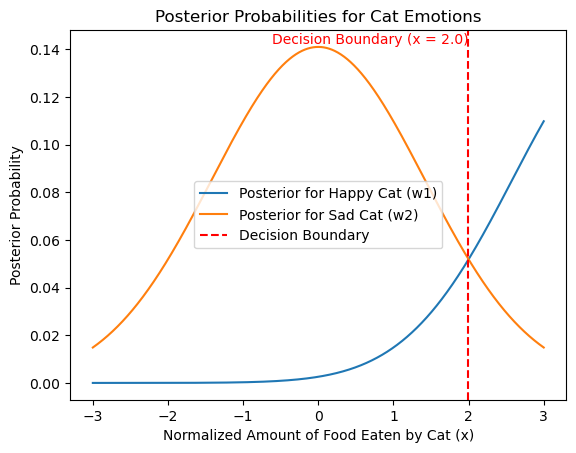

Decision Boundary: x = 1.9969969969969972


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

class SimpleBayesClassifier:
    def __init__(self, mu1, var1, mu2, var2, prior_w1=0.5, prior_w2=0.5):
        self.mu1 = mu1
        self.var1 = var1
        self.sd1 = var1**0.5
        self.mu2 = mu2
        self.var2 = var2
        self.sd2 = var2**0.5
        self.prior_w1 = prior_w1
        self.prior_w2 = prior_w2
        self.decision_boundary = None

    def calculate_posteriors(self, x_values):
        likelihood_w1 = norm.pdf(x_values, loc=self.mu1, scale=self.sd1)
        likelihood_w2 = norm.pdf(x_values, loc=self.mu2, scale=self.sd2)

        posterior_w1 = likelihood_w1 * self.prior_w1
        posterior_w2 = likelihood_w2 * self.prior_w2

        return posterior_w1, posterior_w2

    def find_decision_boundary(self, x_values):
        self.decision_boundary = x_values[np.argmin(np.abs(self.calculate_posteriors(x_values)[0] - self.calculate_posteriors(x_values)[1]))]

    def plot_posteriors(self, x_values):
        if self.decision_boundary is None:
            self.find_decision_boundary(x_values)

        posterior_w1, posterior_w2 = self.calculate_posteriors(x_values)

        # Plot posteriors
        plt.plot(x_values, posterior_w1, label='Posterior for Happy Cat (w1)')
        plt.plot(x_values, posterior_w2, label='Posterior for Sad Cat (w2)')

        # Plot decision boundary
        plt.axvline(x=self.decision_boundary, color='r', linestyle='--', label='Decision Boundary')
        
        # Add text annotation for decision boundary value
        plt.text(self.decision_boundary, max(max(posterior_w1), max(posterior_w2)),
             f'Decision Boundary (x = {round(self.decision_boundary, 2)})',
             verticalalignment='bottom', horizontalalignment='right', color='r')

        # Add labels and legend
        plt.xlabel('Normalized Amount of Food Eaten by Cat (x)')
        plt.ylabel('Posterior Probability')
        plt.title('Posterior Probabilities for Cat Emotions')
        plt.legend()
        plt.show()

if __name__ == "__main__":
    # Generate standard normalized x values
    x_values = np.linspace(-3, 3, 1000)

    # Create the classifier instance
    classifier = SimpleBayesClassifier(mu1=4, var1=2, mu2=0, var2=2)

    # Plot posteriors graph
    classifier.plot_posteriors(x_values)

    print(f'Decision Boundary: x = {classifier.decision_boundary}')


## T3.
What happen to the decision boundary if the cat is happy with a prior of 0.75?

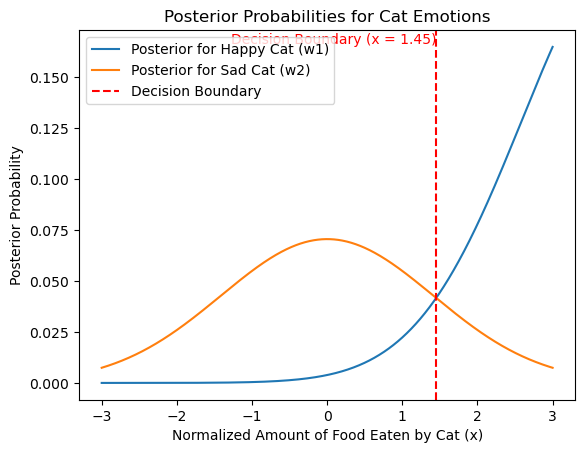

Decision Boundary: x = 1.4504504504504503


In [2]:
# Generate standard normalized x values
x_values = np.linspace(-3, 3, 1000)

# Create the classifier instance with a different prior for the happy cat
classifier = SimpleBayesClassifier(mu1=4, var1=2, mu2=0, var2=2, prior_w1=0.75, prior_w2=0.25)

# Plot posteriors graph
classifier.plot_posteriors(x_values)

print(f'Decision Boundary: x = {classifier.decision_boundary}')

## OT2.

$$P(x|w_1) = \mathcal{N}(\mu_1, \sigma^2), \quad P(x|w_2) = \mathcal{N}(\mu_2, \sigma^2), \quad p(w_1) = p(w_2) = 0.5$$

The decision boundary is where the posterior is the same

$$
\begin{aligned}

P(w_1|x) &= P(w_2|x)\\
\frac{P(x | w_1) P(w_1)}{P(x)} &= \frac{P(x | w_2) P(w_2)}{P(x)}\\
P(x | w_1) &= P(x | w_2)\\
\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\frac{(x-\mu_1)^2}{\sigma^2}}
&=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\frac{(x-\mu_2)^2}{\sigma^2}}\\
(x-\mu_1)^2 &= (x-\mu_2)^2\\
x^2 - 2\mu_1x + \mu_1^2 &= x^2 - 2\mu_2x + \mu_2^2 \\
\therefore\ x &= \frac{\mu_1 + \mu_2}{2}

\end{aligned}
$$

## OT3.
If the student changed his model to
P(x|w1) = N(4,2)
P(x|w2) = N(0,4)
Plot the posteriors values of the two classes on the same axis. What is the decision boundary for this classifier? Assume equal prior probabilities.

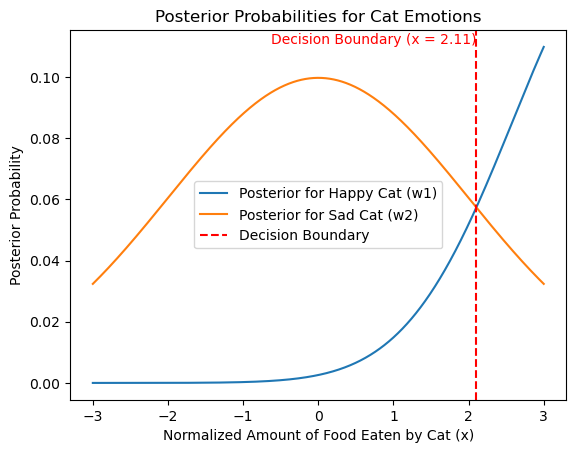

Decision Boundary: x = 2.105105105105105


In [3]:
# Generate standard normalized x values
x_values = np.linspace(-3, 3, 1000)

# Create the classifier instance with a different prior for the happy cat
classifier = SimpleBayesClassifier(mu1=4, var1=2, mu2=0, var2=4, prior_w1=0.5, prior_w2=0.5)

# Plot posteriors graph
classifier.plot_posteriors(x_values)

print(f'Decision Boundary: x = {classifier.decision_boundary}')

# Employee Attrition Prediction